In [2]:
# Cargamos librería
import pandas as pd

# Cargamos los datos. Vienen en formato "csv" (Comma Separated Values)
data = pd.read_csv("https://raw.githubusercontent.com/Club-datos-FCEN/ClubDeDatos/main/2022/01%20-%20Propiedades/CABAprop.csv")

# Vemos los primeros 10 datos
data.head(10)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,barrio
0,-34.652250,-58.385565,NaN,NaN,NaN,300.0,180.0,320000.0,PH,Barracas
1,-34.628248,-58.406525,6.0,NaN,2.0,178.0,240.0,500000.0,Casa,Boedo
2,-34.592796,-58.420930,NaN,NaN,2.0,240.0,157.0,350000.0,Casa,Palermo
3,-34.565632,-58.465134,3.0,NaN,4.0,157.0,NaN,470000.0,Casa,Belgrano
4,-34.622177,-58.522724,NaN,NaN,1.0,140.0,110.0,155000.0,Casa,Versalles
5,-34.632099,-58.497681,3.0,NaN,2.0,95.0,69.0,199900.0,Casa,Velez Sarsfield
6,-34.543070,-58.462586,1.0,NaN,1.0,44.0,38.0,147000.0,Departamento,Nuñez
7,-34.601520,-58.424350,1.0,NaN,1.0,40.0,37.0,92294.0,Departamento,Almagro
8,-34.601520,-58.424350,1.0,NaN,1.0,49.0,44.0,115000.0,Departamento,Almagro
9,-34.601520,-58.424350,1.0,NaN,1.0,40.0,37.0,77000.0,Departamento,Almagro


In [3]:
# Cuántos datos hay?
data.shape

(58571, 10)

In [4]:
# Veamos algunas estadísticas rápidas
data.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,58571.000000,58571.000000,53537.000000,34703.000000,55607.000000,55326.000000,55782.000000,5.857100e+04
mean,-34.598952,-58.437172,2.779816,2.038440,1.498606,102.506651,85.590764,2.362771e+05
std,0.025259,0.037113,1.381505,1.502085,0.836310,784.904628,557.125944,2.157540e+05
min,-34.697266,-58.530468,1.000000,0.000000,1.000000,0.000000,1.000000,4.000000e+04
25%,-34.615243,-58.462336,2.000000,1.000000,1.000000,45.000000,40.000000,1.160000e+05
50%,-34.598962,-58.435193,3.000000,2.000000,1.000000,66.000000,59.000000,1.680000e+05
75%,-34.582047,-58.410200,4.000000,3.000000,2.000000,106.000000,92.000000,2.700000e+05
max,-34.536134,-58.356179,32.000000,130.000000,14.000000,126062.000000,126062.000000,2.000000e+06


Vemos algunas cosas raras, como una propiedad con 130 habitaciones.

In [5]:
# Veamos esa propiedad con un filtro
data[data["bedrooms"] == 130]

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,barrio
21668,-34.588495,-58.444621,NaN,130.0,NaN,NaN,NaN,360000.0,Departamento,Chacarita
29173,-34.588495,-58.444621,NaN,130.0,NaN,NaN,NaN,360000.0,Departamento,Chacarita


A veces conviene tirar estos casos raros para mejorar la *calidad* de los datos, hacerlos más representativos y más amigables para la red neuronal. Lo de recién nos mostraba cómo se verían los datos filtrados, pero no cambió el valor de `data`.
Filtremos de vuelta y guardemos el resultado.

In [6]:
data2 = data[data["bedrooms"] != 130]

Otra cosa importante es cómo manejamos los datos faltantes (que Pandas los representa con un NaN = Not a Number)

In [7]:
# Contar los valores faltantes
data2.isna().sum()

lat                    0
lon                    0
rooms               5032
bedrooms           23868
bathrooms           2962
surface_total       3243
surface_covered     2787
price                  0
property_type          0
barrio                 0
dtype: int64

Una opción es, si me importa mucho una columna, descartar las filas que no tengan ese dato.

In [8]:
data3 = data2.dropna(subset=['surface_total', 'surface_covered'])
data3.isna().sum()

lat                    0
lon                    0
rooms               3876
bedrooms           19837
bathrooms           2006
surface_total          0
surface_covered        0
price                  0
property_type          0
barrio                 0
dtype: int64

Puede parecer que perdimos varios datos, en especial comparado con el original, pero para comparar existen datasets estándar como el California Housing, que tienen alrededor de 20000 datos.

Otra opción es decidir que una columna no me importa (tanto). En este caso faltan muchos datos de `bedrooms`, capaz conviene sacar ese columna.

In [12]:
# Notar que usamos data2, no el data3 que creamos recién
data4 = data2.drop(columns=['bedrooms'])
data4.head()

,lat,lon,rooms,bathrooms,surface_total,surface_covered,price,property_type,barrio
0,-34.652250,-58.385565,NaN,NaN,300.0,180.0,320000.0,PH,Barracas
1,-34.628248,-58.406525,6.0,2.0,178.0,240.0,500000.0,Casa,Boedo
2,-34.592796,-58.420930,NaN,2.0,240.0,157.0,350000.0,Casa,Palermo
3,-34.565632,-58.465134,3.0,4.0,157.0,NaN,470000.0,Casa,Belgrano
4,-34.622177,-58.522724,NaN,1.0,140.0,110.0,155000.0,Casa,Versalles


Finalmente, veamos cómo están distribuidos los datos. Por ejemplo, tenemos sobre-representatividad de algunos barrios? Cómo puede llegar a afectar a nuestras predicciones de precios?

In [13]:
# Cuáles son los barrios que más aparecen?
data['barrio'].value_counts()

Palermo                 7968
Belgrano                4873
Caballito               4144
Almagro                 4124
Villa Crespo            3457
Recoleta                3086
Villa Urquiza           2474
Barrio Norte            2283
Balvanera               1831
Flores                  1740
Nuñez                   1573
Villa Devoto            1078
San Cristobal            991
Colegiales               944
San Telmo                918
Villa del Parque         890
Puerto Madero            840
Saavedra                 807
Floresta                 787
Mataderos                677
Liniers                  665
San Nicolás              658
Villa Luro               645
Boedo                    643
Paternal                 635
Monserrat                609
Parque Chacabuco         606
Parque Centenario        591
Barracas                 564
Villa Pueyrredón         558
Retiro                   552
Chacarita                535
Congreso                 534
Once                     465
Villa Lugano  

Hasta aca llegamos con el primer encuentro! Nos vemos el proximo miércoles a las 15 hs en el aula 1111. Cualquier cosa, no dudes en consultarnos en nuestro instagram @club_de_datos o en el canal de Discord!

# Extra: Algunos Grafiquitos

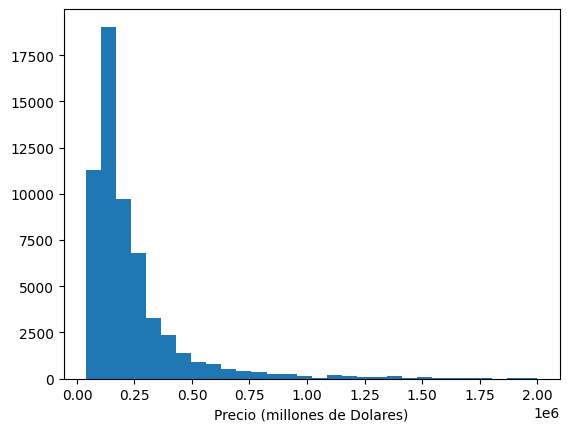

In [10]:
# Cargo la librería para graficar
import matplotlib.pyplot as plt

# Armo un histograma. bins es la cantidad de barras en las que agrupa los precios, pueden jugar a variarlo.
plt.hist(data['price'], bins=30)

# Cosas para que quede más descriptivo el gráfico
plt.title('Precio de Propiedades en CABA')
plt.xlabel('Precio (millones de Dolares)')

# Finalmente, lo muestro
plt.show()

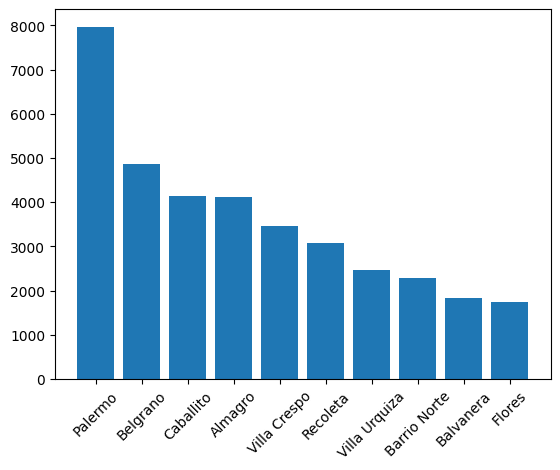

In [11]:
# Ver propiedades por barrio
#  Usamos de vuelta value_counts. El '[:10]' es para quedarse con los 10 barrios más frecuentes
data_por_barrio = data['barrio'].value_counts()[:10]

plt.bar(x=data_por_barrio.index, height=data_por_barrio)

# Se pueden rotar las etiquetas para que no se superpongan entre sí
plt.xticks(rotation=45)
plt.show()